# What is Curve Fit in Scipy

The curve_fit() method of module scipy.optimize that apply non-linear least squares to fit the data to a function.

The syntax is given below.

`scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(- inf, inf), method=None, jac=None, full_output=False, **kwargs)`

Where parameters are:

* f: The model’s f(x,…) function. The independent variable must be the first argument, and the subsequent arguments must be the fitting parameters separately.
* xdata(array_data): It is the independent variable used to measure the data. Can be any object, but should typically be an M-length sequence or a (k, M)-shaped array for functions with k predictors.
* ydata(array_data): A length M array with nominally as the dependent data f(xdata, …).
* p0(array_data): Parameters’ initial best guess (length N). If it is None, all starting values will be 1.
* sigma: Determines the ydata’s level of uncertainty.
* absolute_sigma(boolean): If True, the computed parameter covariance pcov represents the absolute values of sigma in its application.
* check_finite(boolean): If True, make sure the input arrays don’t have any nans or infs, and if they do, issue a ValueError. If the input arrays actually contain nans, setting this argument to False can silently result in nonsensical results. As a default, True.
* bounds(two tuples): Parameters’ lower and upper bounds. No boundaries are the default. A tuple’s elements must each be either an array with a length equal to the number of parameters, or a single element.
* method: A technique for optimization For unconstrained issues, the default is “lm,” and if bounds are given, it is “trf.” When there are fewer observations than variables, the method “lm” will not function, in this situation, try “trf” or “dogbox.”
* jac(string, callable): Function with the signature jac(x,…) that generates a dense array-like structure representing the Jacobian matrix of the model function about parameters. It will be scaled using the sigma you supply. The Jacobian will be mathematically estimated if None (the default). The ‘trf’ and ‘dogbox’ methods’ string keywords can be used to choose a finite difference scheme.
* full_output(boolean): This function returns additional data in the form of infodict, mesg, and ier if True.

The method curve_fit() returns popt(The parameters should be set at their optimum values to minimize the sum of the squared residuals of “f(xdata, *popt) – ydata.”), pcov( popt’s estimated covariance. The parameter estimate’s variance is provided by the diagonals.), infodict(an optional outputs dictionary with the keys) and mesg(a string message containing details about the answer).

# Python Scipy Curve Fit Gaussian

The form of the charted plot is what we refer to as the dataset’s distribution when we plot a dataset, like a histogram. The bell curve, usually referred to as the Gaussian or normal distribution, is the most frequently seen shape for continuous data.

Let’s fit the data to the gaussian distribution using the method curve_fit by following the below steps:

Import the required methods or libraries using the below python code.

In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

Create x and y data using the below code.

In [2]:
x_data = [ -7.0, -6.0, -10.0, -9.0, -8.0, -1.0, 0.0, 1.0, 2.0, -5.0, -4.0, -3.0, -2.0, 7.0, 8.0, 3.0, 4.0, 5.0, 6.0, 9.0, 10.0]
y_data = [ 8.3, 10.6,1.2, 4.2, 6.7, 15.7, 16.1, 16.6, 11.7, 13.5, 14.5, 16.0, 12.7, 10.3, 8.6, 15.4, 14.4, 14.2, 6.1, 3.9, 2.1]

To make use of NumPy arrays’ useful capabilities, convert x_data and y_data into them.

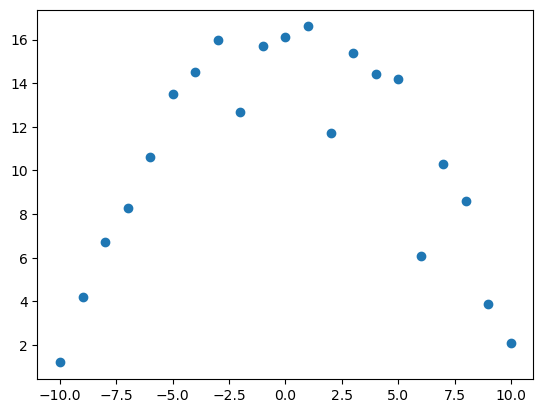

In [3]:
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)
plt.plot(x_data, y_data, 'o')

Create a Gaussian function using the below code.

In [4]:
def Gaussian_fun(x, a, b):
    y_res = a*np.exp(-1*b*x**2)
    return y_res

Now fit the data to the gaussian function and extract the required parameter values using the below code.

In [5]:
params, cov = curve_fit(Gaussian_fun, x_data, y_data)
  
fitA = params[0]
fitB = params[1]

fity = Gaussian_fun(x_data, fitA, fitB)

/tmp/ipykernel_7136/3804335390.py:2: RuntimeWarning: overflow encountered in exp
  y_res = a*np.exp(-1*b*x**2)


Plot the fitted data using the below code.

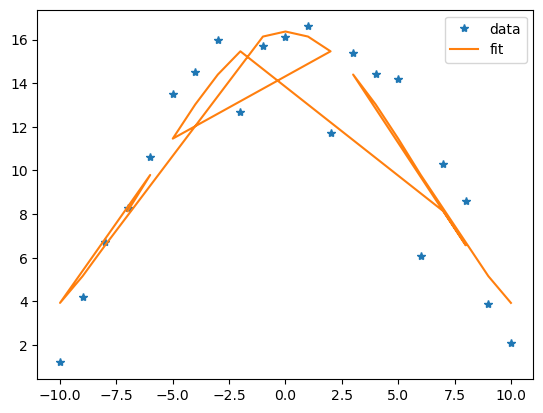

In [6]:
plt.plot(x_data, y_data, '*', label='data')
plt.plot(x_data, fity, '-', label='fit')
plt.legend()

# Python Scipy Curve Fit Multiple Variables

The independent variables can be passed to “curve fit” as a multi-dimensional array, but our “function” must also allow this. Let’s understand with an example by following the below steps:

Import the required libraries or methods using the below python code.

In [7]:
from scipy import optimize
import numpy as np

Create a function that will call the array P and unpack it to p and q using the below code.

In [8]:
def fun(P, x, y, z):
    p,q = P
    return np.log(x) + y*np.log(p) + z*np.log(q)

Create some noisy data to fit using the below code.

In [9]:
p = np.linspace(0.1,1.2,100)
q = np.linspace(1.1,2.1, 100)
x, y, z = 8., 5., 9.
z = fun((p,q), x, y, z) * 1 + np.random.random(100) / 100

Define initial guess and fit data to multiple variables using the below code.

In [10]:
p0 = 7., 3., 6.
print(optimize.curve_fit(fun, (p,q), z, p0))

(array([8.04193096, 4.99986236, 8.99965609]), array([[ 1.33412300e-03,  7.68410543e-05, -2.63600459e-04],
       [ 7.68410543e-05,  4.55390660e-06, -1.50999636e-05],
       [-2.63600459e-04, -1.50999636e-05,  5.24875399e-05]]))


# Python Scipy Curve Fit Initial Guess

The fit parameters are initially estimated using the “curve fit” procedure using values of 1.0. However, there are instances where the fit will not converge, in which case we must offer a wise assumption as a starting point. Let’s see with an example by following the below steps:

Import the required libraries or methods using the below python code.

In [11]:
from scipy import optimize
import numpy as np

Here, we’ll specify some data that are similarly spaced in time and a range of temperatures in the hopes that they will fit an exponential that resembles a charging capacitor. In addition to defining error bars on the temperature values, we take this array of temperatures and add some random noise to it.

In [12]:
def capcitor(x, y, z):
    return y*(1-np.exp(z*x))
t = np.linspace(0.5,3.0, 9)
tempretures = np.array([14.77, 18.47, 20.95, 22.62, 23.73, 24.48, 24.98, 25.32, 25.54])
tempretures = tempretures + 0.4*np.random.normal(size=len(tempretures))
dTempretures = np.array([1.3, 0.8, 1.1, 0.9, 0.8, 0.8, 0.7, 0.6, 0.6])

Now fit data using the below code.

In [13]:
fit_Params, fit_Covariances = optimize.curve_fit(capcitor, t, tempretures)
print(fit_Params)
print(fit_Covariances)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

The code above won’t work if we run it. Take a look at the resulting error message.

As soon as we add some educated guesses (p0) for a and b, we’ll see that the fit is now perfect.

In [14]:
fit_Params, fit_Covariances = optimize.curve_fit(capcitor, t, tempretures, p0 = [30.0, -1.0])
print(fit_Params)
print(fit_Covariances)

[25.48981803 -1.60340544]
[[0.05111881 0.00973338]
 [0.00973338 0.00316739]]


This is how to use the initial guesses with the method curve_fit() for fitting.

# Python Scipy Curve Fit Maxfev

The method curve_fit() of Python Scipy accepts the parameter maxfev that is the maximum number of function calls. In the above subsection, When run fit the function to a data without initial guess, it shows an error Optimal parameters not found: Number of calls to function has reached maxfev = 600.

That means the function is called 600 times and didn’t find any optimal parameters. Let’s increase the value of the argument maxfev and see if it finds the optimal parameters. So here we will take the same example as we have taken in the above subsection “Python Scipy Curve Fit Initial Guess”.

In [15]:
fit_Params, fit_Covariances = optimize.curve_fit(capcitor, t, tempretures, maxfev=800)
print(fit_Params)
print(fit_Covariances)

[-2.06304801e+05  5.43506362e-05]
[[3.07945980e+17 8.11210668e+07]
 [8.11210668e+07 2.13694216e-02]]


From the output, we can see that the optimal parameters are found when the function is called 800 times.

# Python Scipy Curve Fit Exponential

The curve_fit() method in the scipy.optimize the module of the SciPy Python package fits a function to data using non-linear least squares. As a result, in this section, we will develop an exponential function and provide it to the method curve fit() so that it can fit the generated data.

Let’s take an example by following the below steps:

Import the required libraries using the below python code.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

Create an exponential function using the below code.

In [17]:
def expfunc(x, y, z, s):
    return y * np.exp(-z * x) + s

Use the code below to define the data so that it can be fitted with noise, fit for the parameters of the function “expfunc” and also restrict the optimization to a specific area.

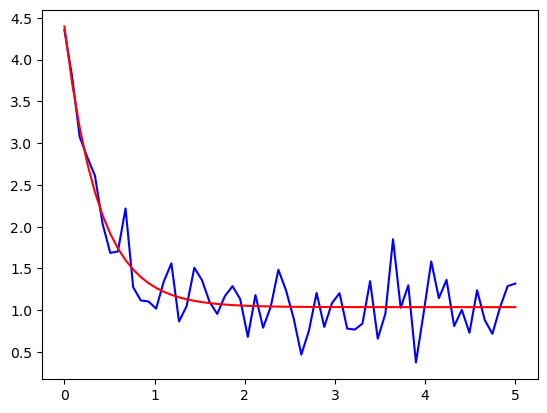

In [18]:
x_data = np.linspace(0, 5, 60)
y_data = expfunc(x_data, 3.1, 2.3, 1.0)

random_numgen = np.random.default_rng()
noise_y = 0.3 * random_numgen.normal(size=x_data.size)

data_y = y_data + noise_y
plt.plot(x_data, data_y, 'b-', label='data')

p_opt, p_cov = optimize.curve_fit(expfunc, x_data, data_y)
plt.plot(x_data, expfunc(x_data, *p_opt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(p_opt))

From the above output, we can see the fitted data to an exponential function using the method curve_fit(), this is how to fit the data to an exponential function.